# **Assignment 10**

In [110]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics

#plotly or other graphing library

In [8]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris()
boston = ds.load_boston()

/Users/JoshForster/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cali

**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [15]:
iris_df = pd.DataFrame(iris.data[:,:],columns=[iris.feature_names])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
pred_names = iris.target_names.tolist()

In [31]:
pred_names[1]

'versicolor'

In [24]:
len(iris_df)==len(iris.target)

True

**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [25]:
iris_knn = KNN(n_neighbors=5)
iris_knn.fit(iris_df.values,iris.target)

y_pred_iris = iris_knn.predict(iris_df.values)

In [32]:
results = [pred_names[p] for p in y_pred_iris]
results

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'virginica',
 'versicolor',
 'virginica',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 '

**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [117]:
from sklearn.preprocessing import StandardScaler

In [129]:
def train_test_knn(X_i,y_i,split=0.3,neighbors=5):
    X = X_i
    y = y_i
    X_train,X_test, y_train, y_test = tts(X,y,test_size=split,random_state=23)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    knn_ex = KNN(n_neighbors=neighbors)
    knn_ex.fit(X_train_scaled,y_train)
    y_pre = knn_ex.predict(X_test_scaled)
    return metrics.accuracy_score(y_test,y_pre)

**Testing the KNN model with a function**

In [130]:
acc_ex = train_test_knn(iris_df.values,iris.target,split=0.35,neighbors=7)
acc_ex

0.9622641509433962

**Standard Ad-hoc KNN model**

In [118]:
X_iris = iris_df.values
y_iris = iris.target

X_train,X_test, y_train, y_test = tts(X_iris,y_iris,test_size=0.3,random_state=23)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [119]:
iris_tts = KNN(n_neighbors=5)
iris_tts.fit(X_train_scaled,y_train)
y_pred = iris_tts.predict(X_test_scaled)
print(metrics.accuracy_score(y_test,y_pred))

0.9777777777777777


In [120]:
metrics.confusion_matrix(y_test, y_pred)

array([[18,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 12]])

**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

In [123]:
train_acc = {}
test_acc = {}
n_s = np.arange(1,31)
for n in n_s:    
    knn = KNN(n_neighbors=n_s)    
    knn.fit(X_train_scaled, y_train)    
    train_acc[n] = knn.score(X_train_scaled, y_train)
    test_acc[n] = knn.score(X_test_scaled, y_test)

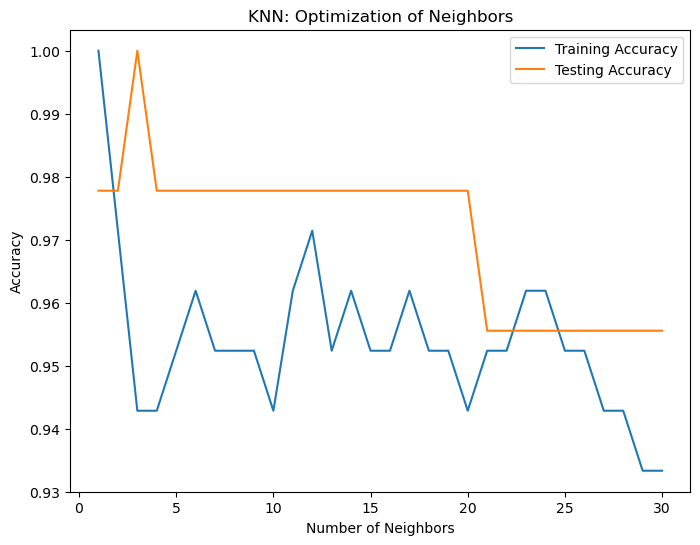

In [124]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Optimization of Neighbors Fit")
plt.plot(n_s, train_acc.values(), label="Training Accuracy")
plt.plot(n_s, test_acc.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.show();

**Q5** 

**Data set: Boston**


* Load sklearn's Boston data into a DataFrame (only the data and feature_name as column names)

* Load sklearn's Boston target values into a separate DataFrame

* Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values 

In [43]:
features = pd.DataFrame(boston.data[:,:],columns=[boston.feature_names])
target = pd.DataFrame(list(boston.target),columns=['MEDV'])
features.head()
print(features['AGE'].mean().values)
print(target.mean().values)
print(target.values)

[68.57490119]
[22.53280632]
[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20.9]
 [24.2]
 [21.7]
 [22.8]
 [23.4]
 [24.1]
 [21.4]
 [20. ]
 [20.8]
 [21.2]
 [20.3]
 [28. ]
 [23.9]
 [24.8]
 [22.9]
 [23.9]
 [26.6]
 [22.5]
 [22.2]
 [23.6]
 [28.7]
 [22.6]
 [22. ]
 [22.9]
 [25. ]
 [20.6]
 [28.4]
 [21.4]
 [38.7]
 [43.8]
 [33.2]
 [27.5]
 [26.5]
 [18.6]
 [19.3]
 [20.1]
 [19.5]
 [19.5]
 [20.4]
 [19.8]
 [19.4]
 [21.7]
 [22.8]
 [18.8]
 [18.7]
 [18.5]
 [18.3]
 [21.2]
 [19.2]
 [20.4]
 [19.3]
 [22. ]
 [20

**Q6** 

**Data set: Boston**

* In the Boston dataset, the feature PTRATIO refers to pupil teacher ratio.

* Using a matplotlib scatter plot, plot MEDV median value of homes as y-axis and PTRATIO as x-axis

* Return back PTRATIO as a NumPy array

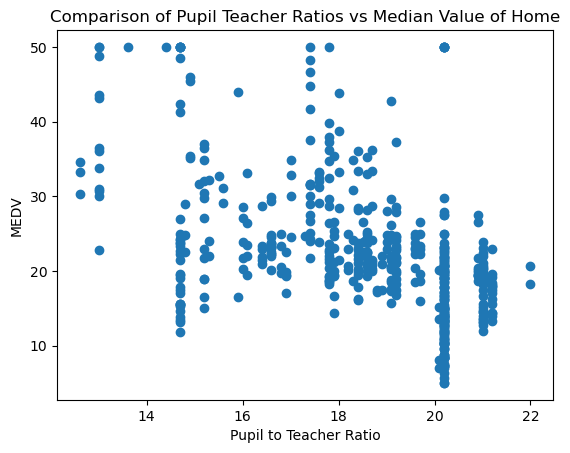

In [80]:
plt.scatter(x=features['PTRATIO'].values,y=target.values)
plt.title('Comparison of Pupil Teacher Ratios vs Median Value of Home')
plt.ylabel('MEDV')
plt.xlabel('Pupil to Teacher Ratio')
plt.show();

In [81]:
features['PTRATIO'].values

array([[15.3],
       [17.8],
       [17.8],
       [18.7],
       [18.7],
       [18.7],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [19.2],
       [19.2],
       [19.2],
       [19.2],
       [18.3],
       [18.3],
       [17.9],
       [17.9],
       [17.9],
       [17.9],
       [17.9],
       [17.9],
       [17.9],
       [17.9],
       [17.9],
       [16.8],
       [16.8],
       [16.8],
       [16.8],
       [21.1],
       [17.9],
       [17.3],
       [15.1],
       [19.7],
       [19.7],
       [19.7],
       [19.7],
       [19.7],
       [19.7],
       [18.6],
       [16.1],
       [16

**Q7**
**Data set: Boston**
* Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib
* Use np.linspace() to generate prediction X values from min to max PTRATIO
* Return back the regression prediction space and regression predicted values
* Make sure to labels axes appropriately

In [68]:
lm_boston = lm.LinearRegression()
lm_boston.fit(features['PTRATIO'].values,target.values)
lm_rng = np.linspace(features['PTRATIO'].min(), features['PTRATIO'].max(), 1000)

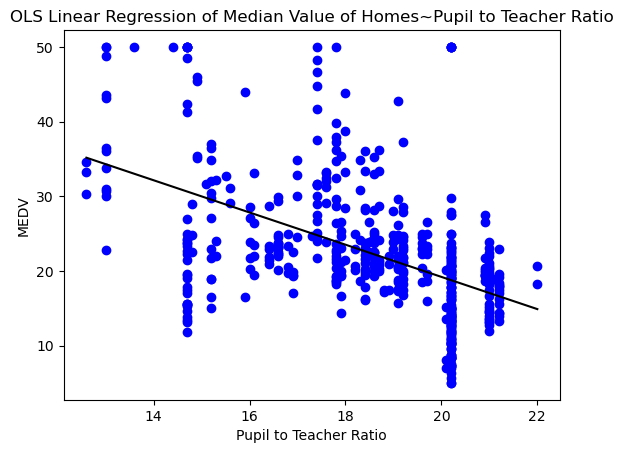

In [126]:
plt.scatter(features['PTRATIO'].values, target.values,color='b')
plt.plot(lm_rng, lm_boston.predict(lm_rng),color='k')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('MEDV')
plt.title('OLS Linear Regression of Median Value of Homes~Pupil to Teacher Ratio')
plt.show();